In [1]:
import pandas as pd
import os
import shutil
print(os.listdir("D:\Pyhton\DATASET"))

['Train', 'Val']


In [2]:
TRAIN_PATH = "D:\Pyhton\DATASET\Train"
VAL_PATH = "D:\Pyhton\DATASET\Val"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    'D:\Pyhton\DATASET\Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1600 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    'D:\Pyhton\DATASET\Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 259 images belonging to 2 classes.


In [16]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/20
8/8 [==============================] - 39s 5s/step - loss: 0.2848 - accuracy: 0.9297 - val_loss: 0.2319 - val_accuracy: 0.9531
Epoch 2/20
8/8 [==============================] - 36s 4s/step - loss: 0.2094 - accuracy: 0.9141 - val_loss: 0.2565 - val_accuracy: 0.8906
Epoch 3/20
8/8 [==============================] - 31s 4s/step - loss: 0.1873 - accuracy: 0.9648 - val_loss: 0.1286 - val_accuracy: 0.9844
Epoch 4/20
8/8 [==============================] - 30s 4s/step - loss: 0.1759 - accuracy: 0.9414 - val_loss: 0.1197 - val_accuracy: 0.9844
Epoch 5/20
8/8 [==============================] - 31s 4s/step - loss: 0.1193 - accuracy: 0.9531 - val_loss: 0.1273 - val_accuracy: 0.9375
Epoch 6/20
8/8 [==============================] - 31s 4s/step - loss: 0.1088 - accuracy: 0.9648 - val_loss: 0.0868 - val_accuracy: 0.9688
Epoch 7/20
8/8 [==============================] - 32s 4s/step - loss: 0.2595 - accuracy: 0.9336 - val_loss: 0.1552 - val_accuracy: 0.9531
Epoch 8/20
8/8 [==================

In [17]:
import matplotlib.pyplot as plt

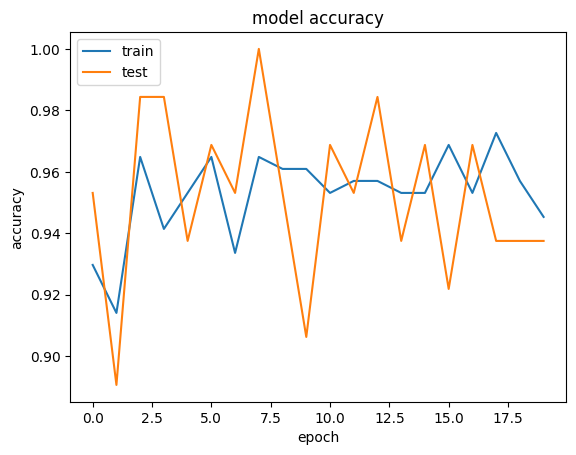

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

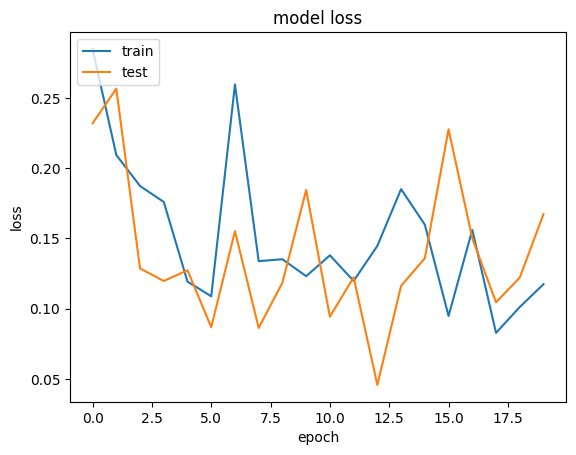

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()